## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import seaborn as sns

## 2. Import Libraries

In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [4]:
dataset = pd.read_csv('iris.csv')

## 3. Sumarize the Dataset

In [5]:
# Print the shape of the data
# It has 150 instances and 5 attributes
print(dataset.shape)

(150, 6)


In [6]:
# Print the first 10 rows of the data
print(dataset.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [7]:
# Print the last 10 rows of the data
print(dataset.tail(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
140  Iris-virginica  
141  Iris-virginica  
142  Iris-virginica  
143  Iris-virginica  
144  Iris-virginica  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris

In [8]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data cleansing

In [9]:
# First, create a dataset backup
dataset_bak = dataset

In [10]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa


In [11]:
# Change column names
dataset.columns = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Species']
print(dataset.head(20))

    Sepal-length  Sepal-width  Petal-length  Petal-width      Species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [12]:
# Class distribution, to see the number of rows that belong to each species
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 5. Data Visualization

### 5.1. Univariate Plots

<Figure size 1000x500 with 0 Axes>

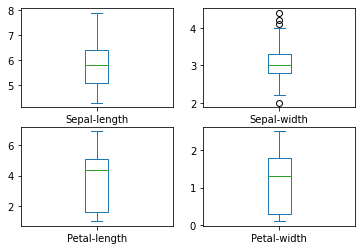

In [13]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

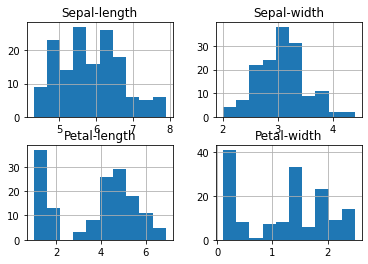

In [14]:
# Histograms. Create a histogram of each input variable to get an idea of the distribution
dataset.hist()
plt.show()

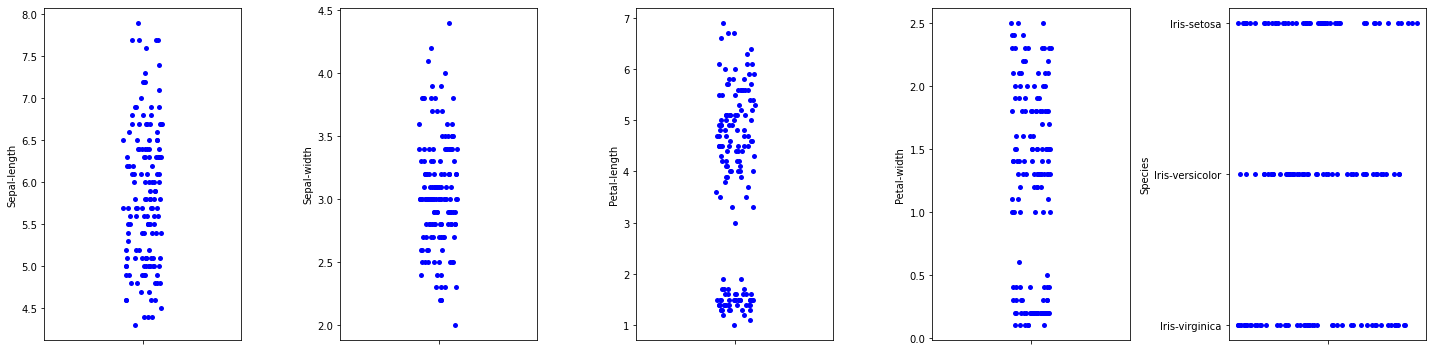

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=len(dataset.columns), figsize=(20, 5))
axs = axs.flatten()
for i, column in enumerate(dataset.columns):
    sns.stripplot(y=dataset[column], ax=axs[i], color='blue')
plt.tight_layout()
plt.show()


### 5.2. Multivariate Plots

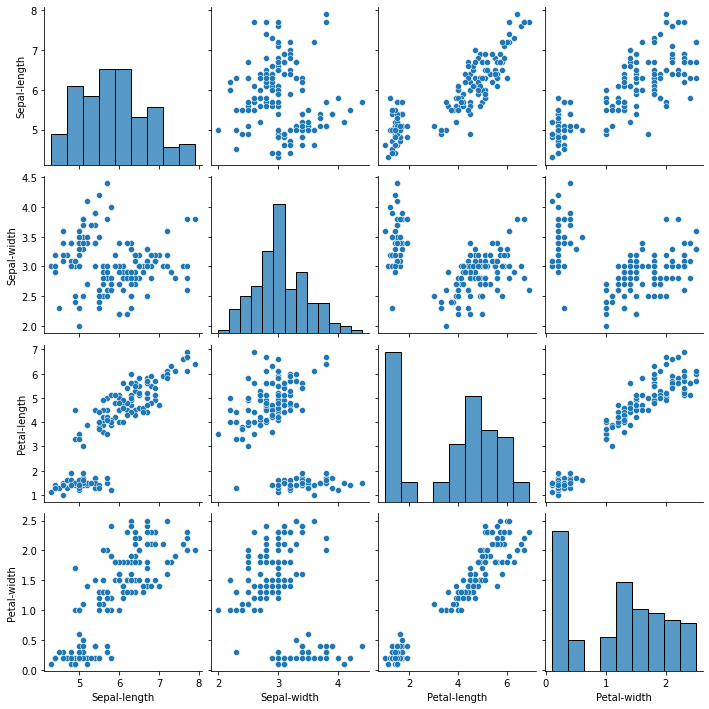

In [16]:
sns.pairplot(dataset)
plt.show()

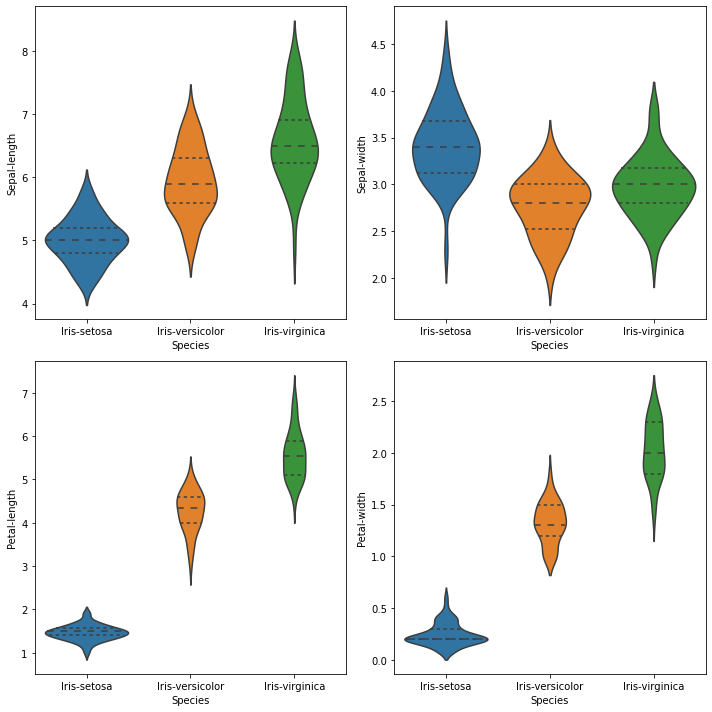

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
for i, column in enumerate(dataset.drop('Species', axis=1).columns):
    sns.violinplot(y=column, x='Species', data=dataset, ax=axs[i], inner='quartile')
plt.tight_layout()
plt.show()

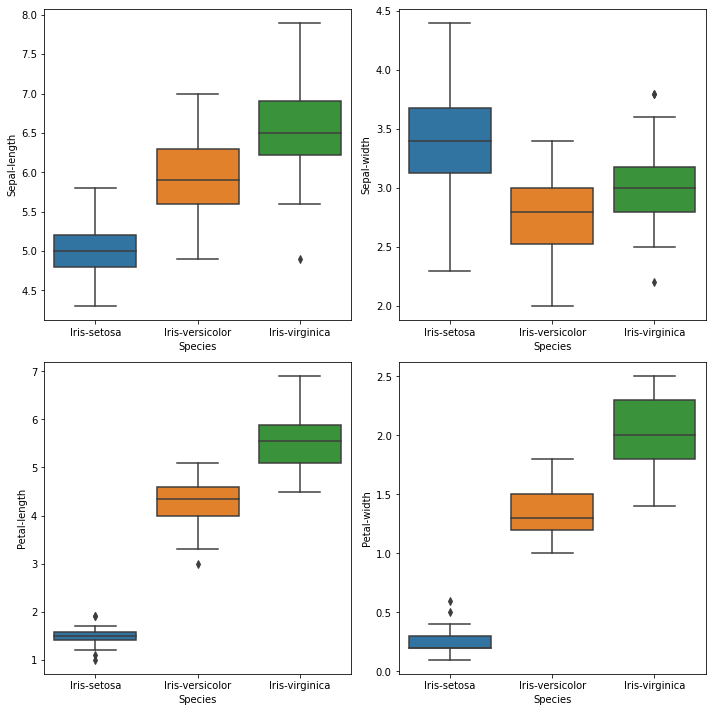

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
for i, column in enumerate(dataset.columns[:-1]):
    sns.boxplot(x='Species', y=column, data=dataset, ax=axs[i])
plt.tight_layout()
plt.show()


## 6. Evaluate Some Algorithms

- We need to know that the model we created is good.
- Use statistical methods to estimate the accuray of the models on unseen data: split the dataset in two, 80% to train, evaluate and select among our models and 20% hold back as a validation dataset

### 6.1. Create a validation dataset

In [19]:
# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [43]:

# Definir algoritmos
models = {
    'LR': LogisticRegression(solver='liblinear', multi_class='ovr'),
        # La regresión logística es un algoritmo lineal que se utiliza para problemas de clasificación binaria o multiclase.
        # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
        # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
    'LDA': LinearDiscriminantAnalysis(),
        # El análisis discriminante lineal es un algoritmo lineal que se utiliza para problemas de clasificación binaria o multiclase.
        # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
        # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
    'KNN': KNeighborsClassifier(),
        # K-Vecinos más cercanos es un algoritmo de clasificación no lineal que se basa en encontrar los k vecinos más cercanos a un punto en el espacio de características.
        # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
        # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
    'CART': DecisionTreeClassifier(),
        # Los árboles de decisión son algoritmos no lineales que se utilizan para problemas de clasificación o regresión.
        # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
        # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
    'NB': GaussianNB(),
        # Naive Bayes es un algoritmo probabilístico que se utiliza para problemas de clasificación.
        # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
        # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
        
    "SVM": SVC(gamma='auto'),
    # Las máquinas de vectores de soporte son algoritmos no lineales que se utilizan para problemas de clasificación binaria o multiclase.
    # En el caso de Iris, el modelo puede utilizarse para predecir la especie de una flor en función de sus características, como la longitud y el ancho de los pétalos y sépalos.
    # Métricas de evaluación importantes: precisión, recall, f1-score, matriz de confusión.
  
}

# Definir métricas
metrics = ['precision', 'recall', 'f1']
        
# Calcular métricas para cada modelo
results = {}
for name, model in models.items():
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    for metric in metrics:
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=metric+'_weighted')
        if name not in results:
            results[name] = {}
        results[name][metric] = cv_results.mean()

In [44]:
for model in results:
    print("\nRESULTADOS DEL MODELO: " + model)
    for result in results[model]:
        print("Para metrica: " + result)
        print(results[model][result])


RESULTADOS DEL MODELO: LR
Para metrica: precision
0.958888888888889
Para metrica: recall
0.9533333333333334
Para metrica: f1
0.952996632996633

RESULTADOS DEL MODELO: LDA
Para metrica: precision
0.9833333333333334
Para metrica: recall
0.9800000000000001
Para metrica: f1
0.9797979797979798

RESULTADOS DEL MODELO: KNN
Para metrica: precision
0.9722222222222223
Para metrica: recall
0.9666666666666668
Para metrica: f1
0.9663299663299663

RESULTADOS DEL MODELO: CART
Para metrica: precision
0.9503968253968255
Para metrica: recall
0.9400000000000001
Para metrica: f1
0.9385521885521886

RESULTADOS DEL MODELO: NB
Para metrica: precision
0.9682539682539684
Para metrica: recall
0.9600000000000002
Para metrica: f1
0.9591750841750841

RESULTADOS DEL MODELO: SVM
Para metrica: precision
0.9777777777777779
Para metrica: recall
0.9733333333333334
Para metrica: f1
0.973063973063973


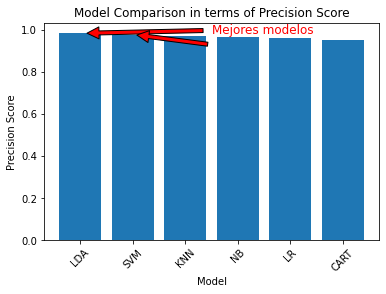

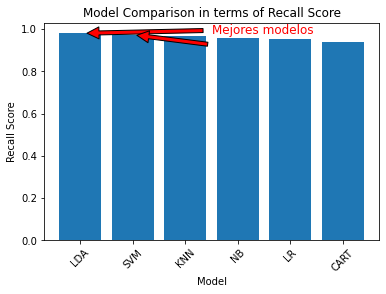

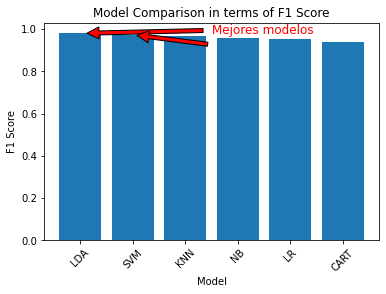

In [45]:
# Crear gráficos de barra para cada métrica
for metric in metrics:
    fig, ax = plt.subplots()
    metric_scores = [r[metric] for r in results.values()]
    sorted_models = [x for _, x in sorted(zip(metric_scores, results.keys()), reverse=True)]
    sorted_scores = sorted(metric_scores, reverse=True)
    ax.bar(sorted_models, sorted_scores)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.capitalize() + ' Score')
    ax.set_title('Model Comparison in terms of ' + metric.capitalize() + ' Score')
    ax.annotate('Mejores modelos', xy=(sorted_models[0], sorted_scores[0]), xytext=(0.5, 0.95),
                textcoords='axes fraction', arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='red')
    ax.annotate('', xy=(sorted_models[1], sorted_scores[1]), xytext=(0.5, 0.9),
                textcoords='axes fraction', arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=12, color='orange')
    plt.xticks(rotation=45)
    plt.show()

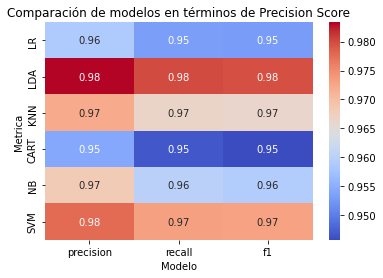

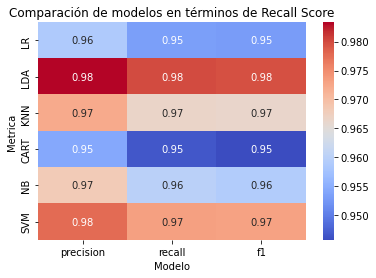

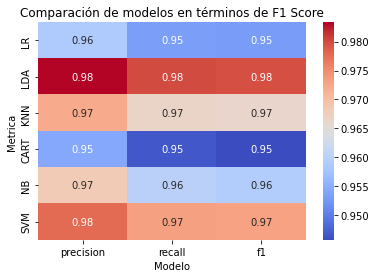

In [21]:
# Create heatmaps for each metric and model
for metric in metrics:
    fig, ax = plt.subplots()
    data = pd.DataFrame(results).T
    sns.heatmap(data=data, annot=True, cmap='coolwarm')
    ax.set_xlabel('Modelo')
    ax.set_ylabel('Metrica')
    ax.set_title('Comparación de modelos en términos de ' + metric.capitalize() + ' Score')
    plt.show()


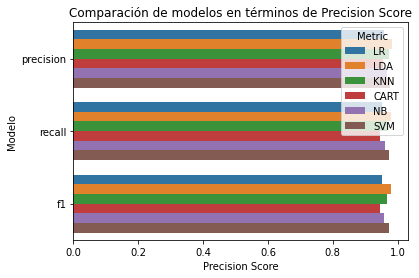

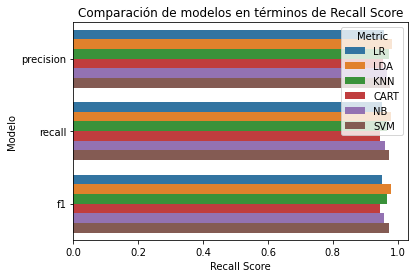

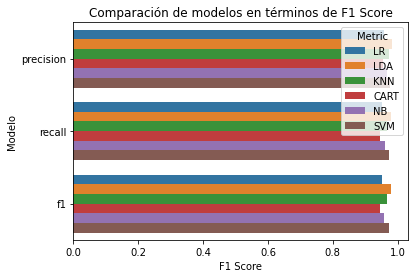

In [22]:
for metric in metrics:
    fig, ax = plt.subplots()
    data = pd.DataFrame(results).stack().reset_index()
    data.columns = ['Model', 'Metric', 'Score']
    sns.barplot(x='Score', y='Model', hue='Metric', data=data)
    ax.set_xlabel(metric.capitalize() + ' Score')
    ax.set_ylabel('Modelo')
    ax.set_title('Comparación de modelos en términos de ' + metric.capitalize() + ' Score')
    plt.show()


## 7. Making predictions and evaluate them

In [23]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

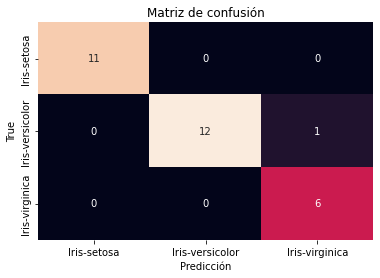

In [24]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Create confusion matrix heatmap
labels = np.unique(Y_validation)
cm = confusion_matrix(Y_validation, predictions, labels=labels)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicción')
ax.set_ylabel('True')
ax.set_title('Matriz de confusión')
plt.show()

In [25]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Conclusiones 

El modelo ha logrado una precisión muy alta para clasificar la clase "Iris-setosa" con valores de precisión, recall y f1-score de 1.00. Esto indica que el modelo es extremadamente preciso y efectivo para identificar esta especie de iris.

Para la clase "Iris-versicolor", el modelo también ha demostrado una buena precisión (1.00) pero con un recall de 0.92 y un f1-score de 0.96. Esto sugiere que el modelo ha clasificado correctamente todos los ejemplos positivos como "Iris-versicolor", pero ha fallado en identificar algunos ejemplos negativos correctamente.

En el caso de la clase "Iris-virginica", aunque la precisión es menor (0.86), el recall es de 1.00 y el f1-score de 0.92. Esto indica que el modelo ha identificado correctamente todos los ejemplos de esta especie, pero ha clasificado incorrectamente algunos ejemplos de otras especies como "Iris-virginica".

La métrica de accuracy del modelo es de 0.97, lo que indica un rendimiento general bastante bueno.

Al comparar los diferentes modelos, el modelo LDA (Análisis Discriminante Lineal) presenta la mayor precisión, recall y f1-score, siendo el más efectivo de todos los modelos probados en este dataset.

Los modelos KNN (K-Nearest Neighbors), SVM (Support Vector Machines) y NB (Naïve Bayes) también muestran resultados muy buenos, con métricas cercanas a las del modelo LDA.

El modelo CART (Classification and Regression Trees) presenta métricas ligeramente más bajas en comparación con los demás modelos, pero aún así muestra un buen rendimiento.